## About Dataset

This dataset has been curated by combining different datasets already available independently but not combined before. 
It has been combined over 11 common features which makes it the largest heart disease dataset available for research purposes. 
The five datasets used for its curation are:

Database:
- Cleveland: 303
- Hungarian: 294
- Switzerland: 123
- Long Beach VA: 200
- Stalog (Heart) Data Set: 270

### Features

The dataset consists of 1190 records of patients from US, UK, Switzerland and Hungary. It has 11 features and 1 target variable.
- Age: Patient's age in years (Numeric)
- Sex: Patient's gender male as 1 female as 0 (Nominal) **Category**
- Chest Pain Type: Type of chest pain categorized into 1 typical, 2 typical angina, 3 non-anginal pain, 4 asymptomatic **Category**
- Resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
- Cholesterol: Serum cholestrol in mg/dl (Numeric)
- Fasting Blood Sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false
- Resting ecrg: result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in
- Max heart rate: Maximum heart rate achieved (Numeric)
- Exercise angina: Angina induced by exercise 0 depicting No 1 depicting Yes (Nominal) **Category**
- Oldpleak: Exercise induced ST-depression in comparison with the state of rest (Numeric) 
- ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping **Category**
- Target: 1 means heart disease 0 means Heart Risk **Category**

In [2]:
import pandas as pd
import numpy as np # data manipulation
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample #downsample the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classific
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [3]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.shape

(1190, 12)

In [6]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [7]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

As we can see, we don't have any missing value in our dataset. It's great becuase we don't need to tackle this problem.

In [8]:
categorical_features = ['sex',
                       'chest pain type',
                       'exercise angina',
                       'ST slope',
                       'target']

In [9]:
for feature in categorical_features:
    print(f"Values of '{feature}' column: {np.sort(df[feature].unique())}")

Values of 'sex' column: [0 1]
Values of 'chest pain type' column: [1 2 3 4]
Values of 'exercise angina' column: [0 1]
Values of 'ST slope' column: [0 1 2 3]
Values of 'target' column: [0 1]


## One-Hot Encoding

In [10]:
X = df.drop('target', axis=1).copy()

In [11]:
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [12]:
y = df['target'].copy()
y.head()

0    0
1    1
2    0
3    1
4    0
Name: target, dtype: int64

In [13]:
X_encoded = pd.get_dummies(X, columns=categorical_features[:-1])

In [14]:
X_encoded.head()

,age,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,oldpeak,sex_0,sex_1,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,exercise angina_0,exercise angina_1,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,40,140,289,0,0,172,0.0,0,1,0,1,0,0,1,0,0,1,0,0
1,49,160,180,0,0,156,1.0,1,0,0,0,1,0,1,0,0,0,1,0
2,37,130,283,0,1,98,0.0,0,1,0,1,0,0,1,0,0,1,0,0
3,48,138,214,0,0,108,1.5,1,0,0,0,0,1,0,1,0,0,1,0
4,54,150,195,0,0,122,0.0,0,1,0,0,1,0,1,0,0,1,0,0


In [15]:
X_encoded.shape

(1190, 19)

## Centering and Scaling

The Radial Basis Function (RBF) that we are using with our Support Vector Machine 
assumes that the data are centered and scaled. In other words, each column should hav 
mean value = 0 and a standard deviation = 1. So we need to do this to both the training and
testing datasets.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Build A Preliminary SVM

In [17]:
clf_svm = SVC(random_state=42, probability=True)
clf_svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [18]:
predictions = clf_svm.predict(X_test_scaled)

In [35]:
cm = confusion_matrix( y_test, predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm,
                              display_labels= ['Heart Risk', 'Heart Disease']
)

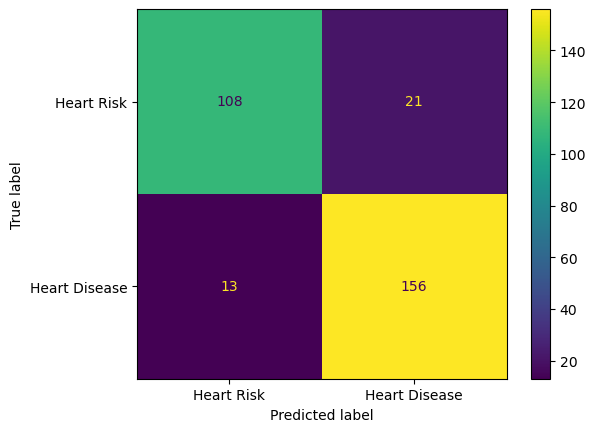

In [36]:
disp.plot()

## Accuracy

In [21]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8859060402684564


In [22]:
tn, fp, fn, tp = cm.ravel()

## Recall (Sensitivity or True Positive Rate)

In [23]:
recall = tp / (tp + fn)
recall

0.9230769230769231

## Precision

In [24]:
precision = tp / (tp + fp)
precision

0.8813559322033898

## Specificity (True Negative Rate)

In [25]:
specificity = tn / (tn + fp)
specificity

0.8372093023255814

In [26]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.9017341040462428